In [1]:
from fastai.vision.all import *

In [2]:
path = '/storage/data/vinted/'

In [3]:
files = get_image_files(path)
len(files)

400

In [4]:
def get_folder_name(x):
    return x.parent.name

In [5]:
dls = ImageDataLoaders.from_path_func(
    path, fnames=files, label_func=get_folder_name,
    seed=11, item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

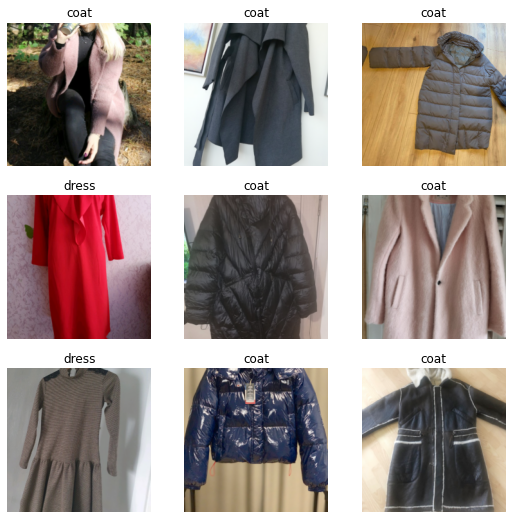

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, model_dir='/storage/models')

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=1.3182567499825382e-06)

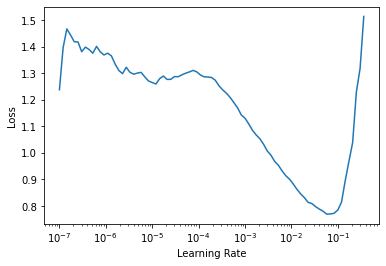

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.056787,1.479430,0.362500,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.645322,0.607845,0.275000,00:04
1,0.617783,0.384830,0.137500,00:04
2,0.508027,0.321278,0.125000,00:04
3,0.412297,0.369580,0.137500,00:05
4,0.340745,0.344639,0.125000,00:04
5,0.280321,0.338958,0.100000,00:04
6,0.247095,0.332760,0.087500,00:04
7,0.210423,0.339414,0.087500,00:04
8,0.183437,0.332804,0.087500,00:04
9,0.163224,0.327918,0.087500,00:04


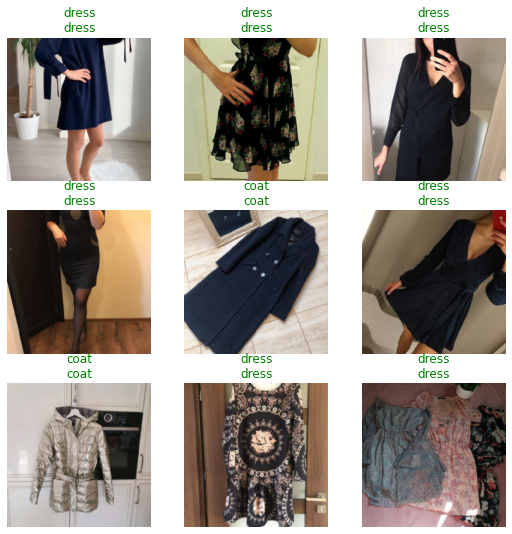

In [10]:
learn.show_results()

In [11]:
interp = Interpretation.from_learner(learn)

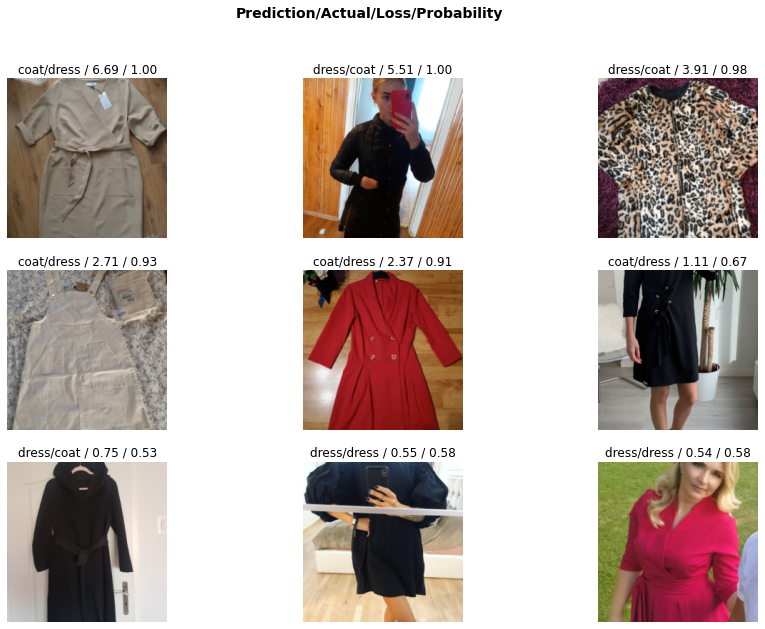

In [12]:
interp.plot_top_losses(9, figsize=(15,10))